By Makye Daniels

## Introduction

The metric I focused on was the effect of the virus Covid-19 on a neighborhood. In this day and age, our number one concern is the Covid-19 virus and people want to do anything they can to avoid contracting it, so I felt it would be appropriate to find out which neighborhoods had the best and worst coivd numbers.

# Metric 1: Covid-19

![Alternative text describing the image](https://www.gau.edu.tr/storage/uploads/7/5/4/375x300/covid-19covid-19-1585867692.gif?vs=1)

## Data Set Used

1. Allegheny County COVID-19 Counts by Municipality and Pittsburgh Neighborhood

### Step 1. Setup

* import pandas and matlib
* import covid data
* Filter dataset

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
# % matplotlib inline

In [2]:
# Import data
url = "https://data.wprdc.org/datastore/dump/0f214885-ff3e-44e1-9963-e9e9062a04d1"
covid_data = pd.read_csv(url, index_col = 'neighborhood_municipality')
covid_data.columns

Index(['indv_tested', 'cases', 'deaths', 'update_date'], dtype='object')

We are going to be using only the first four columns in this dataset.

In [3]:
covid_data = covid_data[[ "indv_tested", "cases", "deaths"]]
covid_data.head(20)

,indv_tested,cases,deaths
neighborhood_municipality,,,
Aleppo,389,14,0
Allegheny Center (Pittsburgh),233,23,0
Allegheny West (Pittsburgh),121,5,0
Allentown (Pittsburgh),374,38,0
Arlington (Pittsburgh),306,32,1
Arlington Heights (Pittsburgh),58,1,1
Aspinwall,440,27,0
Avalon,843,47,4
Baldwin Borough,4467,767,12


### Step 2: Determine the Percentage of positive tests

In [4]:
covid_data['percent positive'] = covid_data['cases']/covid_data['indv_tested']
covid_data = covid_data.sort_values(by = 'percent positive').dropna()
covid_data.head(20)

,indv_tested,cases,deaths,percent positive
neighborhood_municipality,,,,
Trafford,6,0,0,0.000000
Undefined (Pittsburgh),2,0,0,0.000000
St. Clair (Pittsburgh),30,0,0,0.000000
Sewickley Heights,3181,24,0,0.007545
Polish Hill (Pittsburgh),276,4,0,0.014493
Mt. Oliver (Pittsburgh),61,1,0,0.016393
Arlington Heights (Pittsburgh),58,1,1,0.017241
Duquesne Heights (Pittsburgh),1697,47,0,0.027696
Ridgemont (Pittsburgh),343,10,0,0.029155


Here we can see the 20 neighborhoods with the lowest positive rate of covid-19. Now lets get a visual to better understand how they stack up.

<AxesSubplot:xlabel='neighborhood_municipality', ylabel='percent positive'>

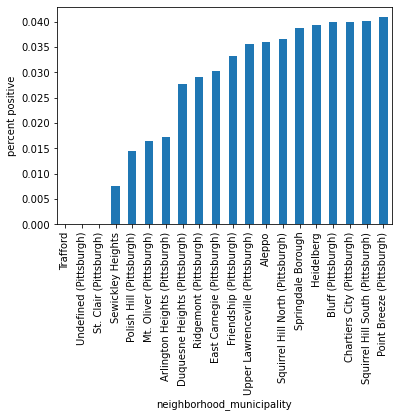

In [5]:
covid_data["percent positive"].head(20).plot.bar(xlabel = "neighborhood_municipality", ylabel = "percent positive")

These are the top 20 neighborhoods in terms of the lowest percentage of covid tests coming back positive.

And here are the worst 20:

In [6]:
covid_data['percent positive'] = covid_data['cases']/covid_data['indv_tested']
covid_data = covid_data.sort_values(by = 'percent positive').dropna()
covid_data.tail(20)

,indv_tested,cases,deaths,percent positive
neighborhood_municipality,,,,
Southside Slopes (Pittsburgh),773,96,0,0.124191
Versailles,254,32,0,0.125984
Crafton Heights (Pittsburgh),595,76,0,0.127731
Wall,78,10,1,0.128205
Banksville (Pittsburgh),745,97,12,0.130201
Westwood (Pittsburgh),521,68,0,0.130518
Mount Oliver Borough,538,74,1,0.137546
Hays (Pittsburgh),49,7,0,0.142857
Chalfant,154,22,1,0.142857


<AxesSubplot:xlabel='neighborhood_municipality', ylabel='percent positive'>

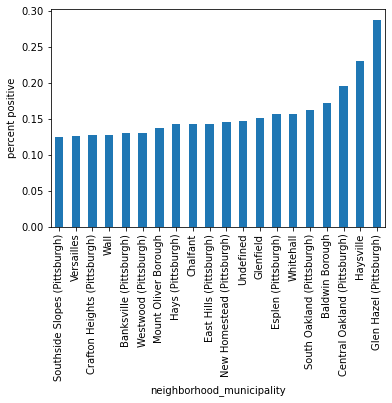

In [7]:
covid_data["percent positive"].tail(20).plot.bar(xlabel = "neighborhood_municipality", ylabel = "percent positive")

## Step 3: Fitting This Into an Overall Metric

Each of the datasets will factor into a neighborhood's overall grade, in the end the lower a neighborhood's grade is, the higher it will rank. Each neighborhood's covid will be multiplied by 100.

In [8]:
covid_data["overall_covid_rating"] = (covid_data['cases']/covid_data['indv_tested'])*100
covid_data["overall_covid_rating"].head(10)

neighborhood_municipality
Trafford                          0.000000
Undefined (Pittsburgh)            0.000000
St. Clair (Pittsburgh)            0.000000
Sewickley Heights                 0.754480
Polish Hill (Pittsburgh)          1.449275
Mt. Oliver (Pittsburgh)           1.639344
Arlington Heights (Pittsburgh)    1.724138
Duquesne Heights (Pittsburgh)     2.769593
Ridgemont (Pittsburgh)            2.915452
East Carnegie (Pittsburgh)        3.030303
Name: overall_covid_rating, dtype: float64

## Conclusion:

Before we come to our conclusion, let's first take a look at the top neighborhoods for indvididuals tested.

In [9]:
covid_data = covid_data.sort_values(by = 'indv_tested').dropna()
covid_data.tail(20)

,indv_tested,cases,deaths,percent positive,overall_covid_rating
neighborhood_municipality,,,,,
Sewickley Heights,3181,24,0,0.007545,0.754480
Wilkinsburg,3199,237,9,0.074086,7.408565
Hampton,3383,278,3,0.082176,8.217558
Shadyside (Pittsburgh),3477,275,14,0.079091,7.909117
Squirrel Hill North (Pittsburgh),3775,138,1,0.036556,3.655629
Scott,3802,383,25,0.100736,10.073645
Squirrel Hill South (Pittsburgh),3855,155,10,0.040208,4.020752
McKeesport,3882,324,10,0.083462,8.346213
Bluff (Pittsburgh),3885,155,0,0.039897,3.989704


When it comes to the neighborhood that is doing the best in regards to its covid number, I would argue that Sewickley Heights is the best neighborhood. While it does not have the lowest percentage of tests that return positive, we must keep in mind that the three above hit only have 6,2, and 30 individuals tested. Sewickley Heights has 3181 test, good enough for top 20 overall while beeing the fourth best in terms of its percentage of positive tests.

________________________________________________________________________________________________________________________________________________________________

# Metric 2: Safety/Crime Rate

By: Makye Daniels

People want to to be safe in their neighborhoods, so the amount and types of crimes a that people commit in various neighborhoods is very important when determining which neighborhood is the best

## Data Set Used: 

Public Safety 2010

### Step 1: Setup

* Import pandas/matlib
* Import Public Safety Data
* Filter Data Set

In [10]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
# % matplotlib inline

In [11]:
url = "https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/204f63f4-296f-4f1d-bbdd-946b183fa5a0/download/public-safety.csv"
crime_data = pd.read_csv(url, index_col = "Neighborhood")
crime_data.head(20)

,Sector #,Population (2010),#Part 1 (Major Crime) Reports (2010),#Part 2 Reports (2010),#Other Police Reports (2010),Part 1 Crime per 100 Persons (2010),Part 2 Crime per 100 Persons (2010),#Murder (2010),#Rape (2010),#Robbery (2010),#Agr. Assault (2010),#Burglary (2010),#Auto Theft (2010),#Drug Violations (2010)
Neighborhood,,,,,,,,,,,,,,
Allegheny Center,3,933,71,141,46,7.6,15.1,0,2,9,5,8,5,31
Allegheny West,3,462,38,49,31,8.2,10.6,1,0,4,6,6,4,12
Allentown,6,"2,500",159,252,160,6.4,10.1,0,2,15,23,48,11,66
Arlington,7,"1,869",50,84,48,2.7,4.5,0,1,8,5,15,7,9
Arlington Heights,7,244,19,37,24,7.8,15.2,0,0,4,5,5,3,7
Banksville,5,"4,144",62,81,61,1.5,2.0,0,0,2,5,9,5,7
Bedford Dwellings,15,"1,202",42,80,38,3.5,6.7,0,0,7,8,8,2,25
Beechview,5,"7,974",193,303,148,2.4,3.8,1,1,7,9,47,37,29
Beltzhoover,6,"1,925",83,131,85,4.3,6.8,1,0,6,10,28,8,38


## Step 2: Ranking by Major Crime

In [27]:
crime_data = crime_data[["Population (2010)","#Part 1 (Major Crime) Reports (2010)", "Part 1 Crime per 100 Persons (2010)"]]
crime_data = crime_data.sort_values(by = '#Part 1 (Major Crime) Reports (2010)').dropna()
crime_data.head(20)

,Population (2010),#Part 1 (Major Crime) Reports (2010),Part 1 Crime per 100 Persons (2010)
Neighborhood,,,
Fairywood,"1,002",3,0.3
New Homestead,990,7,0.7
Chartiers City,477,9,1.9
East Carnegie,570,9,1.6
Glen Hazel,716,10,1.4
Mt. Oliver,509,12,2.4
Summer Hill,"1,051",13,1.2
St. Clair,209,14,6.7
Oakwood,"1,027",14,1.4


Not all crimes are created equal. First we are going to rank by Major Crime Reports, which are, Murder, Rape, Assault, Roberry, Burglary, Auto-Theft, and Drug violations. These are the crimes that people will be most averse to and are essentially the worst crimes. 

Now we will rank each neigborhood by Major crimes per 100 people, arguably a more important statistic than the total number of Major Crimes.

In [31]:
crime_data = crime_data.sort_values(by = 'Part 1 Crime per 100 Persons (2010)').dropna()
crime_data.head(25)

,Population (2010),#Part 1 (Major Crime) Reports (2010),Part 1 Crime per 100 Persons (2010)
Neighborhood,,,
Fairywood,"1,002",3,0.3
New Homestead,990,7,0.7
Lincoln Place,"3,227",32,1.0
Summer Hill,"1,051",13,1.2
Squirrel Hill North,"11,363",148,1.3
Glen Hazel,716,10,1.4
Oakwood,"1,027",14,1.4
Banksville,"4,144",62,1.5
Stanton Heights,"4,601",67,1.5


<AxesSubplot:xlabel='Neighborhood', ylabel='Part 1 Crime per 100 Persons (2010)'>

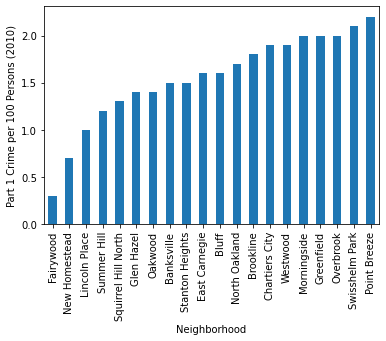

In [14]:
crime_data["Part 1 Crime per 100 Persons (2010)"].head(20).plot.bar(xlabel = "Neighborhood", ylabel = "Part 1 Crime per 100 Persons (2010)")

### What's different? 

When we rank by per 100 vs total, the top two remain unchanged, however, we see that Chartiers City drops by 12 spots, and Mt. Oliver drops out of the top 20 completely. Chartiers City and East Carnegie also see significant drops in their rankings.

### Who is bringing up the rear?

In [15]:
crime_data = crime_data.sort_values(by = "#Part 1 (Major Crime) Reports (2010)").dropna()
crime_data.tail(20)

,Population (2010),#Part 1 (Major Crime) Reports (2010),Part 1 Crime per 100 Persons (2010)
Neighborhood,,,
Beechview,"7,974",193,2.4
Homewood North,"3,280",198,6.0
South Side Slopes,"4,423",210,4.7
Perry South,"4,145",221,5.3
Sheraden,"5,299",222,4.2
Marshall-Shadeland,"6,043",222,3.7
Knoxville,"3,747",223,6.0
East Allegheny,"2,136",234,11.0
Central Oakland,"6,086",236,3.9


In [16]:
crime_data = crime_data.sort_values(by = "Part 1 Crime per 100 Persons (2010)").dropna()
crime_data.tail(20)

,Population (2010),#Part 1 (Major Crime) Reports (2010),Part 1 Crime per 100 Persons (2010)
Neighborhood,,,
Allentown,"2,500",159,6.4
St. Clair,209,14,6.7
Middle Hill,"1,707",114,6.7
Homewood West,818,56,6.8
Allegheny Center,933,71,7.6
Arlington Heights,244,19,7.8
Larimer,"1,728",139,8.0
Allegheny West,462,38,8.2
East Liberty,"5,869",488,8.3


<AxesSubplot:xlabel='Neighborhood'>

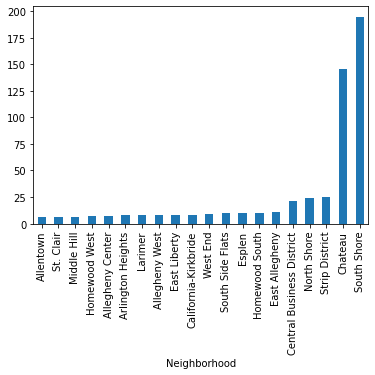

In [17]:
crime_data["Part 1 Crime per 100 Persons (2010)"].tail(20).plot.bar(x = "Neighborhood", y = "Part 1 Crime per 100 Persons (2010)")

The big difference in these two tables is South Shore and Chateau's appearance at the absolute bottom. It is important to note their population are both very small so even a reltively small number of crimes will drastically increase their per 100 numbers.     

### Step 3: Fitting this into our Overall Metric

For this data set, we will take our per 100 numbers and also multiply them by 100 in order to get our overall grade.

In [18]:
crime_data["overall_crime_rating"]=(crime_data["Part 1 Crime per 100 Persons (2010)"]*100)
crime_data["overall_crime_rating"].head(20)

Neighborhood
Fairywood               30.0
New Homestead           70.0
Lincoln Place          100.0
Summer Hill            120.0
Squirrel Hill North    130.0
Oakwood                140.0
Glen Hazel             140.0
Banksville             150.0
Stanton Heights        150.0
East Carnegie          160.0
Bluff                  160.0
North Oakland          170.0
Brookline              180.0
Westwood               190.0
Chartiers City         190.0
Greenfield             200.0
Overbrook              200.0
Morningside            200.0
Swisshelm Park         210.0
Upper Hill             220.0
Name: overall_crime_rating, dtype: float64

## Conclusion: 

Before I pick a best neighborhood in this category, we should rank them by population.

In [19]:
crime_data = crime_data.sort_values(by = 'Population (2010)').dropna()
crime_data.head(20)

,Population (2010),#Part 1 (Major Crime) Reports (2010),Part 1 Crime per 100 Persons (2010),overall_crime_rating
Neighborhood,,,,
Fairywood,"1,002",3,0.3,30.0
Oakwood,"1,027",14,1.4,140.0
Summer Hill,"1,051",13,1.2,120.0
Bedford Dwellings,"1,202",42,3.5,350.0
Northview Heights,"1,214",63,5.2,520.0
Polish Hill,"1,274",34,2.7,270.0
Fineview,"1,285",70,5.4,540.0
Swisshelm Park,"1,361",28,2.1,210.0
Windgap,"1,369",41,3.0,300.0


Taking all things into account, the best neighborhood is Squirrel Hill North. Considering that they have the third highest population, whie also maintaining the third lowest crime rate per 100 people.

________________________________________________________________________________________________________________________________________________________________

# Metric 3: Recreation

![Alternative text describing the image](https://res.cloudinary.com/nrpadev/image/upload/c_fill,f_auto,q_70/50-Ways.jpg)

By: Makye Daniels

Recreation is the staple of a nice neighborhood/community. Having activites the community can go out and engage in is always something that boosts a community's morale. 

## Data Set Used: 

1. City Facilities

## Step 1: Setup

* Import pandas/matlib
* Import City Facilities Data
* Filter Data Set

In [20]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
# % matplotlib inline

First we're going to filter our dataframe to only the metrics that could be of use to us, and get rid of the background noise.

In [21]:
# Import Data
url = "https://data.wprdc.org/datastore/dump/fbb50b02-2879-47cd-abea-ae697ec05170"
rec_data = pd.read_csv(url)
rec_data = rec_data[["inactive", "name", "rentable", "type","primary_user", "neighborhood"]]
rec_data.head(20)

,inactive,name,rentable,type,primary_user,neighborhood
0,f,57th Street Park Building,f,Storage,Department of Public Works,Upper Lawrenceville
1,f,Albert Turk Graham Park Shelter,f,Shelter,Department of Public Works,Crawford-Roberts
2,f,Allegheny Northside Senior Center and Hazlett ...,t,Senior,CitiParks,Allegheny Center
3,f,Ammon Recreation Center,f,Pool,CitiParks,Bedford Dwellings
4,f,Arlington Field Lights Building,f,Utility,CitiParks,South Side Slopes
5,f,Arlington Gym,t,Activity,CitiParks,South Side Slopes
6,f,Arlington Pool Restrooms,f,Pool,CitiParks,South Side Slopes
7,f,Armstrong Field Building,f,Restrooms,CitiParks,South Side Flats
8,f,Arsenal Park Building,f,Restrooms,CitiParks,Lower Lawrenceville
9,f,Asphalt Plant Equipment Shelter,f,Service,Department of Public Works,Highland Park


## Step 2: Which Neighborhood has the Most Recreation?

Here we're going to look at our neighborhood column and see which neighborhoods are listed the most.

In [22]:
rec_data['neighborhood'].nunique()

75

Since their are so many different neigborhoods, we're simply going to look at the top 20.

In [23]:
rec_data_value_counts= rec_data['neighborhood'].value_counts()
rec_data_value_counts.head(20)

Highland Park                30
Squirrel Hill South          29
Perry North                  20
Brookline                    19
Strip District               15
Hazelwood                    14
Brighton Heights             14
Carrick                      12
South Side Slopes            11
Elliott                      11
Lincoln-Lemington-Belmar     11
Morningside                  10
Shadyside                     9
Point Breeze                  8
Central Business District     8
Sheraden                      7
Banksville                    7
Lower Lawrenceville           7
Mount Washington              7
Beltzhoover                   7
Name: neighborhood, dtype: int64

In [24]:
rec_data = pd.read_csv(url, index_col = 'neighborhood')

## Step 3: Converting this to our overall grade

Since the values of the frequency of these towns fits our grading scale as they are, we will leave these alone. 

## Conclusion:

This section is pretty straightforward in its data and its conclusion, Highland Park has the most recreational spaces and sites so it is the best neighborhood in this metric.

________________________________________________________________________________________________________________________________________________________________

# Our Final Grading System

To find our final metric and determine which neighborhood is the best, we're going to take the adjusted scores from each metric, and then we will weight each metric relative to its percieved importance in determining how good a neighborhood is.

### Percentages of Total Grade:

* Covid-19 Grade - 50%
* Crime Rate - 35%
* Recreation - 15%

## Conversion:

In [25]:
covid_data_weighted = covid_data["overall_covid_rating"] * 0.5
crime_data_weighted = crime_data["overall_crime_rating"] * 0.35
rec_data_weighted = rec_data_value_counts * 0.15

overall_grade = pd.DataFrame(covid_data_weighted)
overall_grade['crime_rating'] = crime_data_weighted
overall_grade['recreation_rating'] = rec_data_weighted
overall_grade['total_grade'] = (overall_grade['overall_covid_rating'] + overall_grade['crime_rating'] + overall_grade['recreation_rating'])
overall_grade.index = overall_grade.index.rename("Neighborhood")
overall_grade = overall_grade.fillna(0)
overall_grade.head(50)

,overall_covid_rating,crime_rating,recreation_rating,total_grade
Neighborhood,,,,
Undefined (Pittsburgh),0.000000,0.0,0.0,0.0
Trafford,0.000000,0.0,0.0,0.0
Haysville,11.538462,0.0,0.0,0.0
Chateau (Pittsburgh),2.083333,0.0,0.0,0.0
St. Clair (Pittsburgh),0.000000,0.0,0.0,0.0
Esplen (Pittsburgh),7.812500,0.0,0.0,0.0
Glenfield,7.575758,0.0,0.0,0.0
Mcdonald,5.555556,0.0,0.0,0.0
West End (Pittsburgh),3.409091,0.0,0.0,0.0


Looking at our overall mertric table, we've encountered a problem, the neighborhood identification is different for the different data sets, for example in the covid data set, Pittsburgh neighborhoods have "(Pittsburgh)" afterwards, therefore the other data sets have different id values and cannot find a value across all three columns. So I will have to use the eye test to find the neighborhood that is the best.

## Conclusion:

By lookking over all off the data sets, one neighborhood consisitently ranked near the top in all three metrics...Squirrel Hill South. It ranked 19th in lowest percentage of positive covid tests, 21st in lowest crime per 100 persons, and 2nd in amount/number of recreation locations. Squirrel Hill south is both safe and a good place to relax/enjoy yourself. It is a versatile neighborhood.